**Simulate Simple Regulation (dY/dt = β - αY)**

Let's create the plot, showing how the protein concentration Y rises to a steady state.

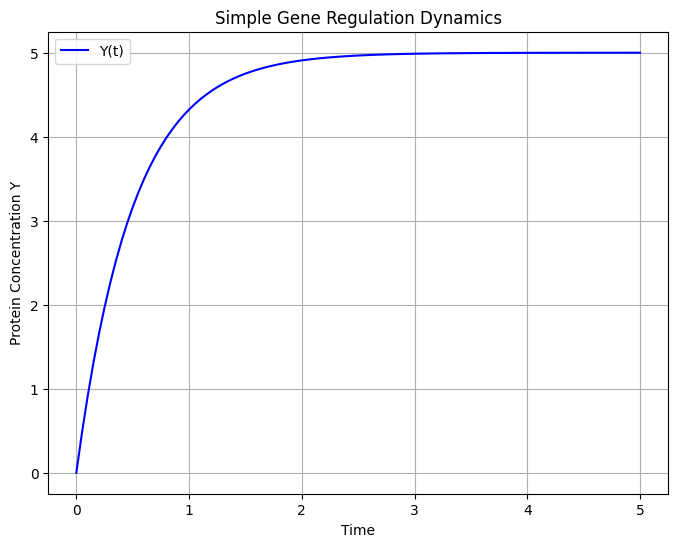

In [7]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# --- 1. Define the Model Equation ---
# This function describes our differential equation: dY/dt = beta - alpha*Y
# odeint needs this function to have a specific format: model(y, t, arg1, arg2, ...)
def simple_regulation(y, t, beta, alpha):
    """
    Defines the differential equation for simple gene regulation.

    y: current value of the protein concentration Y
    t: current time point (odeint requires this, even if not used in the equation)
    beta: production rate
    alpha: removal rate constant
    """
    dydt = beta - alpha * y
    return dydt

# --- 2. Set Up Simulation Parameters ---
# Initial condition: start with no protein
y0 = 0.0

# Time points: We want to simulate the system over a period of time.
# Let's go from time 0 to 5, with 100 points in between for a smooth curve.
t = np.linspace(0, 5, 101)

# Model parameters
beta = 10.0  # Production rate
alpha = 2.0  # Removal rate constant

# --- 3. Solve the ODE ---
# odeint takes the model function, initial condition, time points, and parameters
# The 'args' tuple must contain the parameters in the same order as in the model function
solution = odeint(simple_regulation, y0, t, args=(beta, alpha))

# --- 4. Plot the Results ---
plt.figure(figsize=(8, 6))
plt.plot(t, solution, 'b-', label='Y(t)')
plt.xlabel('Time')
plt.ylabel('Protein Concentration Y')
plt.title('Simple Gene Regulation Dynamics')
plt.grid(True)
plt.legend()
plt.show()

**Verify the Steady State and Response Time**

Production rate (beta): 10.0
Removal rate (alpha): 2.0
Theoretical steady state (beta/alpha): 5.0
Simulated steady state (final value): 4.9998
Theoretical response time (log(2)/alpha): 0.3466
Simulated response time (time to reach 2.50): 0.3500


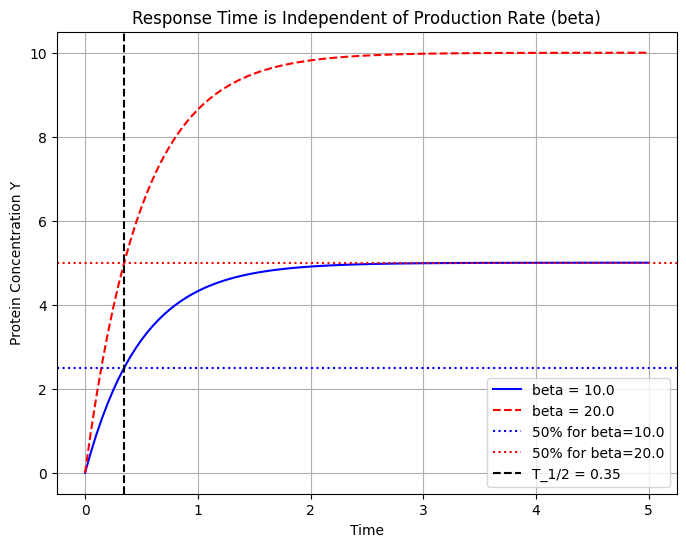

In [8]:


# Theoretical Steady State
y_st_theoretical = beta / alpha
print(f"Production rate (beta): {beta}")
print(f"Removal rate (alpha): {alpha}")
print(f"Theoretical steady state (beta/alpha): {y_st_theoretical}")

# Actual steady state from our simulation (the last value)
y_st_simulated = solution[-1][0]
print(f"Simulated steady state (final value): {y_st_simulated:.4f}")

# Theoretical Response Time (T_1/2)
t_half_theoretical = np.log(2) / alpha
print(f"Theoretical response time (log(2)/alpha): {t_half_theoretical:.4f}")

# Find the simulated response time
# We need to find the time 't' where the concentration 'y' is >= y_st_theoretical / 2
half_max_concentration = y_st_theoretical / 2
# np.where returns the indices where the condition is true. We take the first one.
indices = np.where(solution >= half_max_concentration)[0]
t_half_simulated = t[indices[0]]
print(f"Simulated response time (time to reach {half_max_concentration:.2f}): {t_half_simulated:.4f}")

# --- 6. Demonstrate that Response Time is Independent of Beta ---
# Let's re-run with double the beta
beta_new = 20.0
solution_new = odeint(simple_regulation, y0, t, args=(beta_new, alpha))

# Plot the new result on the same graph to compare
plt.figure(figsize=(8, 6))
plt.plot(t, solution, 'b-', label=f'beta = {beta}')
plt.plot(t, solution_new, 'r--', label=f'beta = {beta_new}')
# Add lines to show the halfway points
plt.axhline(y=y_st_theoretical / 2, color='b', linestyle=':', label=f'50% for beta={beta}')
plt.axhline(y=(beta_new / alpha) / 2, color='r', linestyle=':', label=f'50% for beta={beta_new}')
plt.axvline(x=t_half_theoretical, color='k', linestyle='--', label=f'T_1/2 = {t_half_theoretical:.2f}')

plt.xlabel('Time')
plt.ylabel('Protein Concentration Y')
plt.title('Response Time is Independent of Production Rate (beta)')
plt.grid(True)
plt.legend()
plt.show()